In [2]:
import torch
import matplotlib.pyplot as plt

from neural_style_transfer import (
    run_style_transfer, img_loader, device, cnn, 
    cnn_normalization_mean, cnn_normalization_std, 
    imshow, unloader
)

In [3]:
img_dir = "images/"
content_img = img_loader(img_dir + "tajmahal.jpg")
style_img = img_loader(img_dir + "starrynight.jpg")

print(f"Content image shape: {content_img.shape}")
print(f"Style image shape: {style_img.shape}")

assert content_img.size() == style_img.size(), "Content and style images must have the same size"

Content image shape: torch.Size([1, 3, 128, 128])
Style image shape: torch.Size([1, 3, 128, 128])


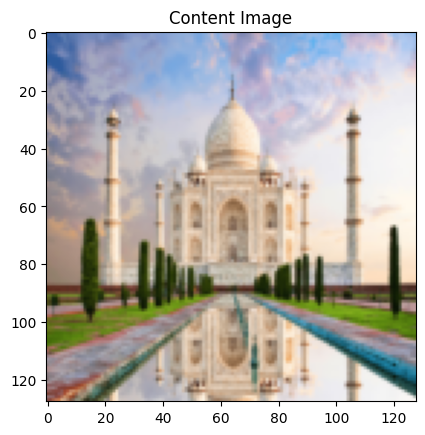

In [4]:
imshow(content_img, title='Content Image')

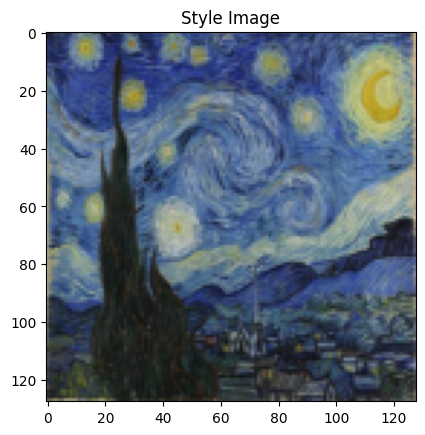

In [5]:
imshow(style_img, title='Style Image')

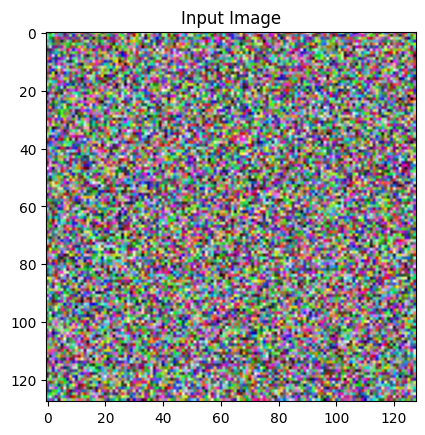

In [ ]:
# Initialize input image (start with content image or white noise)
# Option 1: content image
# input_img = content_img.clone()

# Option 2: white noise (often gives more artistic results)
input_img = torch.randn(content_img.data.size(), device=device)

imshow(input_img, title='Input Image')

In [7]:
output = run_style_transfer(
    cnn, cnn_normalization_mean, cnn_normalization_std,
    content_img, style_img, input_img, 
    num_steps=300,  # Reduce for faster testing, increase for better quality
    style_weight=1000000, 
    content_weight=1
)

run [50]:
Style Loss : 16.117296 Content Loss: 35.876293

run [100]:
Style Loss : 6.700703 Content Loss: 22.397228

run [150]:
Style Loss : 4.644637 Content Loss: 16.802288

run [200]:
Style Loss : 3.791058 Content Loss: 14.202435

run [250]:
Style Loss : 3.304687 Content Loss: 12.751548

run [300]:
Style Loss : 2.972706 Content Loss: 11.864366



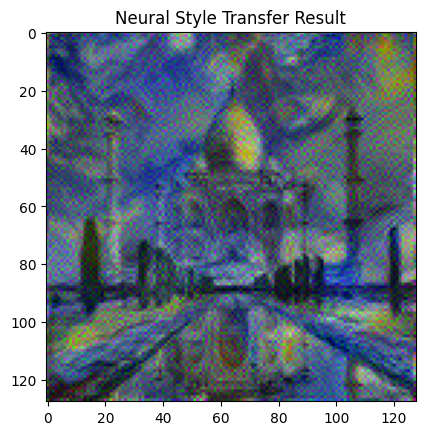

In [8]:
imshow(output, title='Neural Style Transfer Result')
result_image = output.cpu().clone()
result_image = result_image.squeeze(0)
result_image = unloader(result_image)
result_image.save('images/result3.jpg')

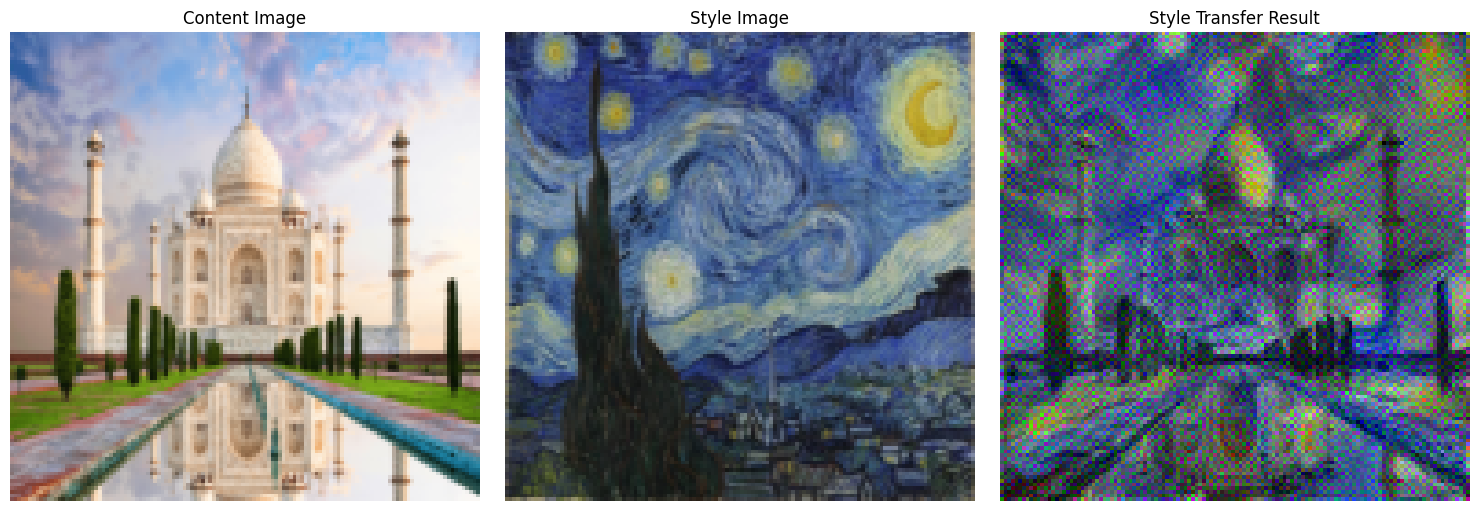

In [9]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

content_display = content_img.cpu().clone().squeeze(0)
content_display = unloader(content_display)
axes[0].imshow(content_display)
axes[0].set_title('Content Image')
axes[0].axis('off')

style_display = style_img.cpu().clone().squeeze(0)
style_display = unloader(style_display)
axes[1].imshow(style_display)
axes[1].set_title('Style Image')
axes[1].axis('off')

result_display = output.cpu().clone().squeeze(0)
result_display = unloader(result_display)
axes[2].imshow(result_display)
axes[2].set_title('Style Transfer Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()